In [10]:
import os
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from spit import tools
from spit.analysis.functions import dimerKD as dimerKD
from spit.analysis.functions import dimertracks as dimertracks

plt.style.use(
    r'U:\DNA-PAINT-SPT\nature_7pt.mplstyle')


def plot_dimer_insets(df_dimers, path_data, concentrations, ax=None):
    # Parameters for insets
    size = 0.25  # inset size (fraction of parent ax)
    padding_x = 0.04  # distance from left and right bounding box
    padding_y = 0.6  # distance between upper and lower row
    shift_upper_row_x = 0  # shift upper row closer to center
    shift_upper_row_y = 0.1  # shift lower row up
    titleshift = [-0.8, .9, .9, -0.8]
    filter_D = 0.01  # drop immobile particles
    filter_length = 20  # to prevent too crowded plots

    axins0 = ax.inset_axes((padding_x+shift_upper_row_x, 1 -
                           padding_y-size+shift_upper_row_y, size, size))
    axins1 = ax.inset_axes((padding_x, padding_y, size, size))
    axins2 = ax.inset_axes((1-padding_x-size, padding_y, size, size))
    axins3 = ax.inset_axes((1-padding_x-size-shift_upper_row_x,
                           1-padding_y-size+shift_upper_row_y, size, size))

    paths_coloc = []
    for idx, value in enumerate(concentrations):
        paths_coloc.append(glob(
            os.path.dirname(path_data) + f'/data/{concentrations[idx]} M/*_colocs_nm.csv', recursive=True))

    concentrations_written = [tools.float2SI(np.float64(
        concentration))+'M' for concentration in concentrations]

    for idx, axi in enumerate([axins0, axins1, axins2, axins3]):
        paths_colocC = paths_coloc[idx][0]
        df_tracks_coloc, df_stats_coloc = dimertracks.prepare_tracks(
            paths_colocC, filter_length=filter_length, filter_D=filter_D)

        dimertracks.plot_tracks(df_tracks_coloc, 'skyblue', ax=axi)
        axi.set_facecolor("none")
        axi.xaxis.set_visible(False)
        axi.yaxis.set_visible(False)
        axi.set_xlim(1000, 70000)
        axi.set_ylim(1000, 70000)
        axi.set_title(concentrations_written[idx], y=titleshift[idx])
        axi.spines.top.set(visible=True)
        axi.spines.right.set(visible=True)

K_X = 5.9e-03 +/- 5.6e-04 [1/um2] 
K_B = 3.3e-07 +/- 1.1E-08 [1/um3] =  5.4e-10 M
corr. factor =  4.2e-01 +/-  1.0e-02
Fit peak: 2.8e-10 M = K_B/2


100%|██████████| 76/76 [00:00<00:00, 182.88it/s]


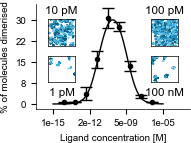

In [11]:
# Load data
path_data = r'U:\DNA-PAINT-SPT\Fig1I\df_dimers.csv'
df_dimers = pd.read_csv(path_data)

inset_concentrations = ['1E-12', '1E-11', '1E-10', '1E-7']  # in Molar


# Plot
f, ax = plt.subplots(1, 1)
f.subplots_adjust(left=0.25, right=0.95, bottom=0.25,
                  top=0.95, wspace=0.5, hspace=0.2)
f.set_figheight(1.5)
f.set_figwidth(2.2)

dimerKD.plot_dimer_fit(df_dimers, annotation=False, ax=ax)
plot_dimer_insets(df_dimers, path_data, concentrations=inset_concentrations, ax=ax)
